<a href="https://colab.research.google.com/github/YichiRockyZhang/Modeling-Senate-Deliberation/blob/main/PHIL409C_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Summary of "Opinion Diffusion Software with Strategic Opinion Revelation and Unfriending" (Shepherd, Weaver, and Goldsmith)**

[Link to the paper](https://arxiv.org/pdf/2006.12572.pdf )

# **Part 1. Motivations**
Traditionally, deliberation and diffusion were modeled more statically. For instance, the following feature were typical of classical models:

1.   Binary states for each node (0 or 1)
2.   Nodes are connected by undirected edges
3.   Nodes update based on the same rule

In contrast, the researchers from the University of Kentucky wanted to write their own software suite with more dynamic features that have been studied in more recent literature, including:
1.   Social Dynamics (unfriending)
2.   Triadic closure
3.   Different types of agents

# **Part 2. Simulation Flow**

1.    Agents observe their neighbors’ states and determine actions to take
with each.
2.    Each agent executes its chosen actions.
3.    Each agent updates its opinion according to its update rule.
4.    New friend connections are introduced by the network itself (via triadic closure). The basic example of triadic closure is when A is friends with B and C, and B and C are not friends, B and C will then become friends.

# **Part 3.1 Variables/Notation**

**General Notation:**
*   $N(i)$ : the neighborhood/group of confidants/friends of agent $i$ (including $i$).
*   $K$ : the set of topics.
*   $k$ : the size of set $K$ (the number of topics).
*   $V$ : the set of vertices/agents in the social graph.
*   $E=\{(i,j) : j \in N(i)\}=\{(i,j) : i \in N(j)\}$ : the set of friends (edges) in the graph. Friendship is mutual by default, so the edges are undirected (this can be changed in the software).
*   $\vec{w}_{*i}=\{w_{ji} : j \in V\}$ : the column vector denoting all of the weights influencing $i$. (See below for $w_{ij}$.)
*   $\textbf{W} = (\vec{w}_{1} \vec{w}_{2} \ldots \vec{w}_{|V|})$ : the matrix containing each agent's influences. $W$ is often normalized. (See below for $w_{ij}$.)


**Agent (Node) and Edge Properties:**
*   $\vec{b^t_i} = {\{−1, 1\}}^K$ : agent $i$'s private opinions about $K$ topics at time $t$. $i$'s opinion on topic $k$ is $b^t_{ik}$. 
*   $r^*_i$ : the reward/utility function for agent $i$'s archetype (*). So, $r^*_i(j)$ is the utility that $j$ provides to $i$ given $j \in N(i)$.
*   $upd_i$ : the update rule outlining the process that $i$ uses to change an opinion (in $\vec{b_i}$).
*   $P(upd_i)$ : the probability an agent will change its opinion
in the face of disagreement/agreement (depending on $i$'s archetype)
*   $P(unf)$ : the probability that an agent severs its connection to another node if the connection is not valuable (does not provide enough utility as computed by $r^*_i$)
*   $res(i)$ : the degree that $i$ is resistant to other opinions
*   $w_{ij} \in [0,1]$ :  the *weight* associated with the directed edge from $i$ to $j$. The weight denotes i’s influence over j.
*   $\vec{m}^t_{ij}=\{-1,0,1\}^K$ : a masking vector describing which of $i$’s opinions are revealed to $j$ at time $t$. For instance, if $\vec{m}^t_{1,2}=\{0,1\}$, that means agent $1$ has masked their opinion on topic $1$ from agent $2$ but has told agent $2$ their opinion about topic $2$. Presumably, a mask of $-1$ means agent $i$ lied to agent $j$ about thier opinion. All $\vec{m}^t_{ij}$ are rows in matrix $\textbf{m}^t_i$, which represents all the opinions that $i$ has revealed to every other neighbor. If $i$ and $j$ are not friends $m^t_{ijk}=m^t_{jik}=0$ for all $K$ issues. Note: If two agents share some opinions with each other, and one agent unfriends another and refriends them later $m^t_{ijk}=m^t_{jik}=0$ when they are refriended.



# **3.2 Computational Details**
*   $\textbf{B}^t=\{\vec{b}^t_i : i \in V\}$ : the set of all agents' complete set of private opinions at time $t$.
*   $\hat{\textbf{b}}^t_i = \bigcup\limits_{j \in V} \vec{m}^t_{ij}$ : a matrix(?) of what agent $i$ knows about other agents' opinions at time $t$ (called agent $i$'s view, appears to be equivalent to matrix $\textbf{m}^t_i$)
*   $\overline{\textbf{W}}^\top_{*i} = \overline{w}_{ji} = w_{ji}/\sum_{j \in N(i)}{w_{ji}}$ (as listed in the paper). This notation feels a bit off given that $w_{ji}$ is a weight. I feel they might mean $\overline{\textbf{W}}^\top_{*i} = \vec{w}^\top_{*i}/\sum_{j \in N(i)}{w_{ji}}$. At any rate, $\overline{\textbf{W}}^\top_{*i}$ is meant to be the normalized vector of weights of the agents influencing $i$. Their notation seems to suggest it is a matrix, but I don't think that's possible, given that influences only seem to correspond to agents and not topics (i.e. an agent's influence over another applies over all topics).
*   $\widetilde{b}^t_i = \overline{\textbf{W}}^\top_{*i}\hat{\textbf{b}}^t_i$ : $\widetilde{b}^t_i$ is the aggregate opinion profile (taking weights into account) for $i$'s neighborhood. This is used in update rules, so an agents can potentially change their opinion on a topic by comparing $\widetilde{b}^t_ik$ to $b^t_ik$ for some topic $k$.


# **3.3 Default Settings:**
*   An agent's reward is based off its distance from other agents in the *opinion space*. By default, distance between two sets of opinions $\vec{b}^t_i$ and $\vec{b}^t_k$ is the number of disagreements they have (taking masking into account) divided by the number of topics.
*   By defaut, Agents change their opinions when a simple majority have a different opinion (for homophilic and heterophilic agents). The opposite is true for adversarial agents.



# **4. Archetypes**
**What is an Archetype?** An **archetype** is a type of agent. While the software supports custom archetypes for each agent, archetypes are probably best used for defining a type of agent that can be used across the network repeatedly as is done be default. Archetypes are defined by three aspects: their reward, their update rule and their policy.
*   **Reward/utility function ($r^*_i$):**  outputs the agent's satisfaction with their status in the network at a given point in time.
*   **Update rule:** determines the circumstances that will cause an agent to cause its opinion on a topic
*   **Policy:** defines what action the agent will take regarding their friends (usually based off the utility function. 


## **Default Archetypes:**

### **Homophilic Agents (HOM):** 
Agents that want to share the same opinion that those around them.

**Reward/utility function:** $r^{hom}_i(j) = 1 − d(i, j)$, meaning they derive utility from being ideologically similar to their neighbords.

**Update rule:**
$$
b^{t+1}_{ik} = \begin{cases} 
  -1(b^t_{ik}) & \text{if } \widetilde{b^t}_{ik} * {b^t}_{ik} < 0 \text{ with probability } P(\textit{upd}_i) \\
  b^t_{ik} & \text{otherwise.}
\end{cases}
$$

**Policy:**
>for each neighbor $j \in N(i)$:
>>**if** $r^{hom}_i < \textit{unf_thresh } \textbf{and}$ and $j$ has revealed at least 1 opionion to $i$:

>>**then** unfriend $j$ with probability $Pr(\textit{unf })$

>>**else if** $∃k : m_{ijk} = 0$, reveal opinion $k$ with
probability 0.5.

### **Heterophilic Agents (HET):** 
Agents that want opinion diversity.

**Reward/utility function:** $r^{het}_i(j) = 1−2|d(i, j)−0.5|$, meaning they derive the most utility when they agree on half of the topics and disagree on half the topics.

**Update rule (same as HOM):**
\begin{cases} 
  -1(b^t_{ik}) & \text{if } \widetilde{b^t}_{ik} * {b^t}_{ik} < 0 \text{ with probability } P(\textit{upd}_i) \\
  b^t_{ik} & \text{otherwise.}
\end{cases}

**Policy:** Not explicitly defined

### **Adversarial Agents (ADV):** 
Agents that want opinion diversity.

**Reward/utility function:** $r^{hom}_i(j) = d(i, j)$

**Update rule:**

$$
b^{t+1}_{ik} = \begin{cases} 
  -1(b^t_{ik}) & \text{if } \widetilde{b^t}_{ik} * {b^t}_{ik} > 0 \text{ with probability } P(\textit{upd}_i) \\
  b^t_{ik} & \text{otherwise.}
\end{cases}
$$

**Policy:** Not explicitly defined



# **5.1 Simulation on the 116th Congress (1/3/19-1/3/2021)**
I wanted to use their `SocialNetworkEvolutionEngine` but there was no documentation for how to construct a graph from an XML file, and the constructor does not take networkx `Graph()` object, and manually setting the `self._graph` attribute would almost certainly lead to some kind of error. 

ideas: friend forming = alliance building, 

In [ ]:
from bs4 import BeautifulSoup
import requests
import re
import random

import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import networkx as nx
sns.set()

! pip3 install mesa
from mesa import Agent, Model
from mesa.time import RandomActivation, SimultaneousActivation
from mesa.space import SingleGrid, NetworkGrid
from mesa.datacollection import DataCollector

! git clone https://github.com/bornxfree/SocialNetworkEvolutionEngine.git

# **Model**

In [ ]:
class DeliberationModel(Model):
    def __init__(self, num_agents, network, num_topics=1, simultaneous_update=True):
        
        self.num_agents = num_agents
        self.network = NetworkGrid(network)
        self.num_topics = num_topics
        self.simultaneous_update = simultaneous_update
        
        prob_update = 1.0
        prob_unfriend = 0.3
        unf_thresh = 0.5

        self.schedule = RandomActivation(self)
        self.running = True
        
        # Set up agents
        agent_id = 0
        for i in range(num_agents): 
            ideal_score = df.loc[i, 'ideal_score']
            init_opinions = np.random.rand(num_topics) < ideal_score

            archetype = 'HOM'
            archetype = 'HET' if random.random() <= 0.7 else 'HOM'
            archetype = 'ADV' if random.random() <= 0.02 else 'HOM'

            e = Senator(i, self, ideal_score, init_opinions, prob_update,
                prob_unfriend, unf_thresh, archetype=archetype)

            self.schedule.add(e)
        self.datacollector = DataCollector(
            agent_reporters={"opinions": "opinions"})
        
    def step(self):
        for e in self.schedule.agents:
            if self.simultaneous_update: 
                e.update()
            else: 
                e.update_asynch()
            self.schedule.steps += 1

# **Agent Class**

In [ ]:
def dist(opinions1, opinions2):
    # opinions1, opinions2 are lists or np.arrays
    ops1, ops2 = np.array(opinions1), np.array(opinions2)
    return np.average(ops1 != ops2)

class Senator(Agent):

    def __init__(self, unique_id, model, ideal_score, init_opinions, prob_update,
                prob_unfriend, unf_thresh, archetype='HOM', reward_func=None, update_rule=None,
                policy=None, noise = 0):

        # Archetypes: HOM, HET, ADV, CUSTOM

        # did not implement masking because I don't think that's common in an
        # institution like the Senate 

        super().__init__(unique_id, model)
        self.ideal_score = ideal_score
        self.opinions = init_opinions
        self.old_opinions = init_opinions
        self.prob_update = prob_update
        self.prob_unfriend = prob_unfriend
        self.unf_thresh = unf_thresh
        self.reward_func=reward_func
        self.update_rule=update_rule
        self.policy=policy
        self.archetype = archetype
        
        if archetype == 'CUSTOM':
            self.reward_func = reward_func
            self.update_rule = update_rule
            self.policy = policy

        if self.reward_func is None or archetype == 'HOM':
            self.reward_func = lambda other_agent: 1 - dist(self.opinions,
                                                      other_agent.old_opinions)
        elif archetype == 'HET':
            self.reward_func = \
                self.reward_func = lambda other_agent: 1 - 2* \
                math.fabs(dist(self.opinions, other_agent.old_opinions) - 0.5)
        elif archetype == 'ADV':
            self.reward_func = lambda other_agent: dist(self.opinions,
                                                      other_agent.old_opinions)
        else: raise
    
    def update(self):
        self.model.datacollector.collect(self.model)
        self.old_opinions = self.opinions
        neighbors_nodes = [a for a in self.model.network.get_neighbors(self.unique_id)]
        neighbors_nodes.remove(self.unique_id)
        neighbors = [a for a in self.model.schedule.agents if a.unique_id in neighbors_nodes]

        # Update (beliefs) Function
        neighbors_beliefs = np.array([a.old_opinions for a in neighbors])
        weights = np.array([self.model.network.G[self.unique_id][a.unique_id]['weight']\
                                            for a in neighbors])
        weights = weights/np.sum(weights)
        agg_beliefs = np.dot(weights, neighbors_beliefs)

        for k in range(model.num_topics):
            will_change = self.opinions[k] * agg_beliefs[k] < 0 and \
                                      random.random() < self.prob_update

            if will_change:
                if self.archetype == 'HOM' or self.archetype == 'HET':
                    self.opinions[k] = -1*self.opinions[k]
                if self.update_rule is not None:
                    self.update_rule(self)
            else:
                if self.archetype == 'AFV':
                    self.opinions[k] = -1*self.opinions[k]

        # Policy
        if self.policy is not None:
            self.policy(self)
        else:

            for other in neighbors:
                # Reward Function
                if self.reward_func is not None:
                    reward = self.reward_func(other)
                else:
                    reward = 1 - dist(self.opinions, other.old_opinions)

                if reward < self.unf_thresh and random.random() < self.prob_unfriend:
                    self.model.network.G.remove_edge(self.unique_id, other.unique_id)
        

# **Runtime**

In [ ]:
url = "https://www.govtrack.us/congress/members/report-cards/2019/senate/ideology"
page = requests.get(url)
root = BeautifulSoup(page.content)

table = root.find_all('table')
df = pd.read_html(str(table))[0]

df.drop(index=[0,1,102], columns=[0], inplace=True)
df.reset_index(drop=True, inplace=True)
df.columns = ['ideal_score', 'title']
df['ideal_score'] = df['ideal_score'].astype(float)

def parse(s):
    match = re.match('(Sen. [^\[]*) \[(D|R|I)-([a-zA-Z]+)\]', s)
    return match[1], match[2], match[3] # Name, Party, State

for index, row in df.iterrows():
    raw_txt = row['title']
    df.loc[index, ['name', 'party', 'state']] = parse(raw_txt)

df.drop(columns=['title'], inplace=True)
df

,ideal_score,name,party,state
0,1.00,Sen. Blackburn,R,TN
1,0.96,Sen. Ernst,R,IA
2,0.91,Sen. Braun,R,IN
3,0.91,Sen. Cruz,R,TX
4,0.91,Sen. Inhofe,R,OK
...,...,...,...,...
95,0.07,Sen. Booker,D,NJ
96,0.07,Sen. Merkley,D,OR
97,0.03,Sen. Gillibrand,D,NY
98,0.02,Sen. Sanders,I,VT


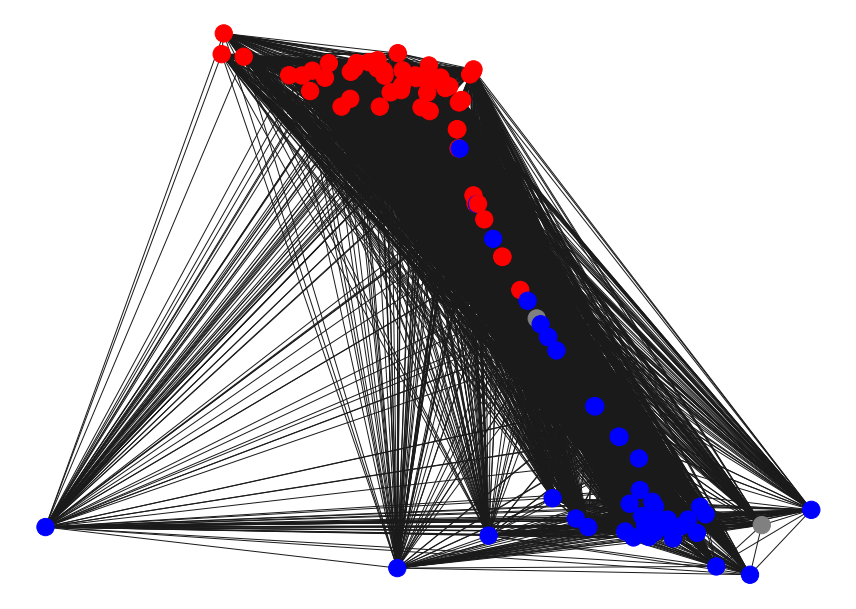

In [ ]:
NUM_SENATORS = 100

network = nx.Graph()
network.add_nodes_from([x for x in range(NUM_SENATORS)])

# Senators give others a weight inversely proportional to their ideological differences
for i in range(NUM_SENATORS):
    for j in range(NUM_SENATORS):
        i_score = df.loc[i, 'ideal_score']
        j_score = df.loc[j, 'ideal_score']        
        network.add_edge(i, j, weight=(1-math.fabs(i_score - j_score)-0.5)*2)

# This part of the code only works of k=1 topics
color_map = []

for i in range(NUM_SENATORS):
    if df.loc[i, 'party'] == 'R':
        color_map.append('red')
    elif df.loc[i, 'party'] == 'D':
        color_map.append('blue')
    else:
        color_map.append('grey')

model = DeliberationModel(num_agents=NUM_SENATORS, network=network,
                          num_topics=10, simultaneous_update=True)

nx.draw(model.network.G, node_color=color_map, )

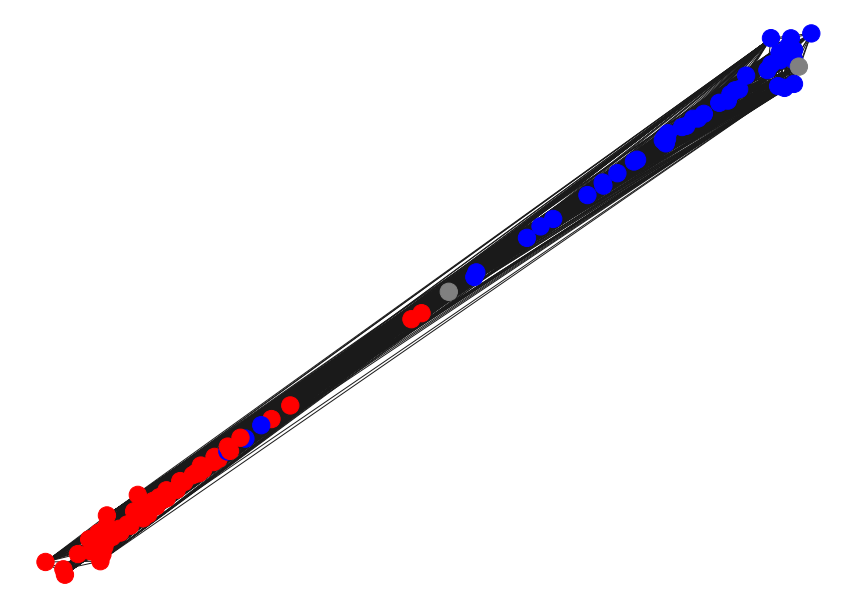

In [ ]:
iterations = 100
i = 0
opinions = [[] for x in range(iterations)]

running = True
while running and model.schedule.steps < iterations*NUM_SENATORS:
    for sen in model.schedule.agents: 
        opinions[i].append(sen.opinions[0])
    i+=1
    model.step()

sns.set(rc={'figure.figsize':(11.7,8.27)})

infavor_over_time = [np.count_nonzero(iter) for iter in opinions]
nx.draw(model.network.G, node_color=color_map)

True

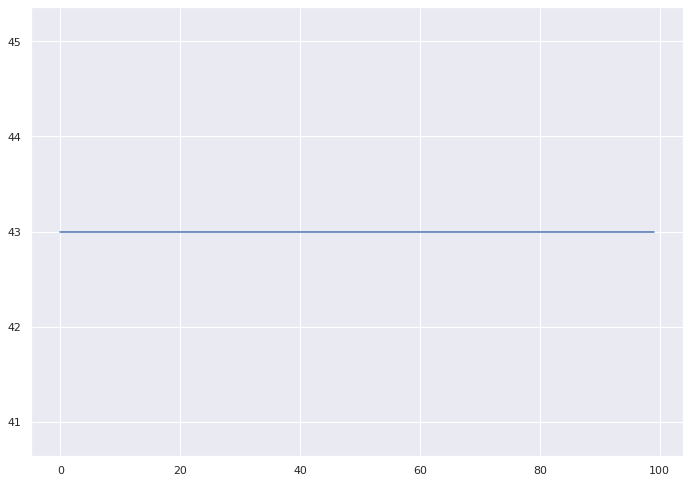

In [ ]:
plt.plot(infavor_over_time)
infavor_over_time[0] == infavor_over_time[99]